In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import requests
import quandl

from operator import itemgetter
from pandas.io.json import json_normalize
from scipy import special, optimize

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

In [31]:
quandl.ApiConfig.api_key = 'HWZYrHmanku_oE1Ydh5g'

In [32]:
data = quandl.get("WIKI/MSFT")

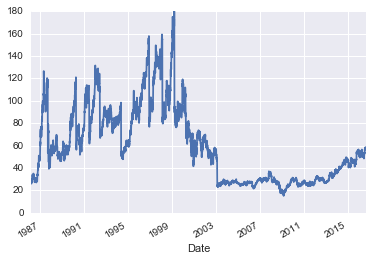

In [33]:
data['Close'].plot()

In [40]:
req = 'https://www.quandl.com/api/v3/datasets/WIKI/'
req = '%sMSFT.json?&collapse=daily' %(req)


In [41]:
req

'https://www.quandl.com/api/v3/datasets/WIKI/MSFT.json?&collapse=daily'

In [42]:
r = requests.get(req)
cols = r.json()['dataset']['column_names'][0:5]
df = pd.DataFrame(np.array(r.json()['dataset']['data'])[:,0:5],columns=cols)
df.Date = pd.to_datetime(df.Date)
df[['Open','High','Low','Close']] = df[['Open','High','Low','Close']].astype(float)

In [48]:
from bokeh.plotting import show, output_file, output_notebook
from bokeh.charts import TimeSeries

output_notebook()

d = dict(
    STOCK=df['Close'],
    Date=df['Date'],
)

_plot = TimeSeries(d, x='Date', y='STOCK', color='blue', legend=True, title='Stock Price')
_plot.xaxis.axis_label = 'Date'
_plot.yaxis.axis_label = 'Price'

show(_plot)

Loading BokehJS ...

In [46]:
df['Date']

0      2016-08-30
1      2016-08-29
2      2016-08-26
3      2016-08-25
4      2016-08-24
5      2016-08-23
6      2016-08-22
7      2016-08-19
8      2016-08-18
9      2016-08-17
10     2016-08-16
11     2016-08-15
12     2016-08-12
13     2016-08-11
14     2016-08-10
15     2016-08-09
16     2016-08-08
17     2016-08-05
18     2016-08-04
19     2016-08-03
20     2016-08-02
21     2016-08-01
22     2016-07-29
23     2016-07-28
24     2016-07-27
25     2016-07-26
26     2016-07-25
27     2016-07-22
28     2016-07-21
29     2016-07-20
          ...    
7641   1986-04-24
7642   1986-04-23
7643   1986-04-22
7644   1986-04-21
7645   1986-04-18
7646   1986-04-17
7647   1986-04-16
7648   1986-04-15
7649   1986-04-14
7650   1986-04-11
7651   1986-04-10
7652   1986-04-09
7653   1986-04-08
7654   1986-04-07
7655   1986-04-04
7656   1986-04-03
7657   1986-04-02
7658   1986-04-01
7659   1986-03-31
7660   1986-03-27
7661   1986-03-26
7662   1986-03-25
7663   1986-03-24
7664   1986-03-21
7665   198

In [ ]:
import requests
#Set the stock we are interested in, AAPL is Apple stock code
stock = 'AAPL'
#Your code
api_url = 'https://www.quandl.com/api/v1/datasets/WIKI/%s.json' % stock
session = requests.Session()
session.mount('http://', requests.adapters.HTTPAdapter(max_retries=3))
raw_data = session.get(api_url)

# Probably want to check that requests.Response is 200 - OK here 
# to make sure we got the content successfully.

# requests.Response has a function to return json file as python dict
aapl_stock = raw_data.json()
# We can then look at the keys to see what we have access to
aapl_stock.keys()
# column_names Seems to be describing the individual data points
aapl_stock['column_names']
# A big list of data, lets just look at the first ten points...
aapl_stock['data'][0:10]

In [30]:
import numpy as np

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.charts import TimeSeries, Bar, Line
from bokeh.sampledata.stocks import AAPL

output_notebook()
line_plot = Line(data['Close'])
show(line_plot)

def datetime(x):
    return np.array(x, dtype=np.datetime64)

p1 = figure(x_axis_type="datetime", title="Stock Closing Prices")

p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(datetime(AAPL['date']), AAPL['adj_close'], color='#A6CEE3', legend='AAPL')

output_file("stocks.html", title="stocks.py example")
show(gridplot([[p1]]))  # open a browser

'''
p1.line(datetime(GOOG['date']), GOOG['adj_close'], color='#B2DF8A', legend='GOOG')
p1.line(datetime(IBM['date']), IBM['adj_close'], color='#33A02C', legend='IBM')
p1.line(datetime(MSFT['date']), MSFT['adj_close'], color='#FB9A99', legend='MSFT')
p1.legend.location = "top_left"

aapl = np.array(AAPL['adj_close'])
aapl_dates = np.array(AAPL['date'], dtype=np.datetime64)

window_size = 30
window = np.ones(window_size)/float(window_size)
aapl_avg = np.convolve(aapl, window, 'same')

p2 = figure(x_axis_type="datetime", title="AAPL One-Month Average")
p2.grid.grid_line_alpha = 0
p2.xaxis.axis_label = 'Date'
p2.yaxis.axis_label = 'Price'
p2.ygrid.band_fill_color = "olive"
p2.ygrid.band_fill_alpha = 0.1

p2.circle(aapl_dates, aapl, size=4, legend='close',
          color='darkgrey', alpha=0.2)

p2.line(aapl_dates, aapl_avg, legend='avg', color='navy')
p2.legend.location = "top_left"
'''


'\np1.line(datetime(GOOG[\'date\']), GOOG[\'adj_close\'], color=\'#B2DF8A\', legend=\'GOOG\')\np1.line(datetime(IBM[\'date\']), IBM[\'adj_close\'], color=\'#33A02C\', legend=\'IBM\')\np1.line(datetime(MSFT[\'date\']), MSFT[\'adj_close\'], color=\'#FB9A99\', legend=\'MSFT\')\np1.legend.location = "top_left"\n\naapl = np.array(AAPL[\'adj_close\'])\naapl_dates = np.array(AAPL[\'date\'], dtype=np.datetime64)\n\nwindow_size = 30\nwindow = np.ones(window_size)/float(window_size)\naapl_avg = np.convolve(aapl, window, \'same\')\n\np2 = figure(x_axis_type="datetime", title="AAPL One-Month Average")\np2.grid.grid_line_alpha = 0\np2.xaxis.axis_label = \'Date\'\np2.yaxis.axis_label = \'Price\'\np2.ygrid.band_fill_color = "olive"\np2.ygrid.band_fill_alpha = 0.1\n\np2.circle(aapl_dates, aapl, size=4, legend=\'close\',\n          color=\'darkgrey\', alpha=0.2)\n\np2.line(aapl_dates, aapl_avg, legend=\'avg\', color=\'navy\')\np2.legend.location = "top_left"\n'

In [21]:

from bokeh.plotting import show, output_file, output_notebook
from bokeh.charts import TimeSeries

output_notebook()
_plot = TimeSeries(data['Close'], color='blue', legend=True, title='Stock Price')
_plot.xaxis.axis_label = 'Date'
_plot.yaxis.axis_label = 'Price'

show(_plot)


Loading BokehJS ...

In [23]:
import requests
#Set the stock we are interested in, AAPL is Apple stock code
stock = 'AAPL'
#Your code
api_url = 'https://www.quandl.com/api/v1/datasets/WIKI/%s.json' % stock
session = requests.Session()
session.mount('http://', requests.adapters.HTTPAdapter(max_retries=3))
raw_data = session.get(api_url)

# Probably want to check that requests.Response is 200 - OK here 
# to make sure we got the content successfully.

# requests.Response has a function to return json file as python dict
aapl_stock = raw_data.json()
# We can then look at the keys to see what we have access to
aapl_stock.keys()
# column_names Seems to be describing the individual data points
#aapl_stock['column_names']
# A big list of data, lets just look at the first ten points...
#aapl_stock['data'][0:10]

[u'column_names',
 u'code',
 u'source_name',
 u'name',
 u'display_url',
 u'urlize_name',
 u'data',
 u'updated_at',
 u'private',
 u'from_date',
 u'errors',
 u'frequency',
 u'to_date',
 u'premium',
 u'source_code',
 u'type',
 u'id',
 u'description']

In [24]:
data['Close']

Index([u'Open', u'High', u'Low', u'Close', u'Volume', u'Ex-Dividend',
       u'Split Ratio', u'Adj. Open', u'Adj. High', u'Adj. Low', u'Adj. Close',
       u'Adj. Volume'],
      dtype='object')

In [29]:
aapl_stock['data'][0]

[u'2016-08-29',
 106.62,
 107.44,
 106.29,
 106.82,
 24696220.0,
 0.0,
 1.0,
 106.62,
 107.44,
 106.29,
 106.82,
 24696220.0]

In [10]:
import json
from operator import itemgetter

drugname = 'tylenol'
request_string='https://api.fda.gov/drug/event.json?api_key=TTwz56GNTpZnsL4il0pLIwz7F43QObZOQEssWlSU&search=patient.drug.medicinalproduct:'+drugname+'&count=patient.reaction.reactionmeddrapt.exact'

json_df = requests.get(request_string).json()
    
json_list = json_df['results']
    
print drugname
for x in range(0, min(15, len(json_list))):
    entry = json_list[x]
    print 'term: ' + str(entry['term']) + " count " + str(entry['count'])


tylenol
term: NAUSEA count 5227
term: FATIGUE count 4393
term: HEADACHE count 4302
term: DRUG INEFFECTIVE count 4131
term: PAIN count 4032
term: DYSPNOEA count 3882
term: DIARRHOEA count 3803
term: VOMITING count 3626
term: DIZZINESS count 3163
term: ASTHENIA count 2825
term: PYREXIA count 2763
term: ARTHRALGIA count 2580
term: PAIN IN EXTREMITY count 2275
term: FALL count 2272
term: BACK PAIN count 2128


SyntaxError: 'return' outside function (<ipython-input-10-e1f3696c2b3c>, line 16)

In [11]:
json_df

{u'meta': {u'disclaimer': u'Do not rely on openFDA to make decisions regarding medical care. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated. We may limit or otherwise restrict your access to the API in line with our Terms of Service.',
  u'last_updated': u'2015-01-01',
  u'license': u'https://open.fda.gov/license/',
  u'terms': u'https://open.fda.gov/terms/'},
 u'results': [{u'count': 5227, u'term': u'NAUSEA'},
  {u'count': 4393, u'term': u'FATIGUE'},
  {u'count': 4302, u'term': u'HEADACHE'},
  {u'count': 4131, u'term': u'DRUG INEFFECTIVE'},
  {u'count': 4032, u'term': u'PAIN'},
  {u'count': 3882, u'term': u'DYSPNOEA'},
  {u'count': 3803, u'term': u'DIARRHOEA'},
  {u'count': 3626, u'term': u'VOMITING'},
  {u'count': 3163, u'term': u'DIZZINESS'},
  {u'count': 2825, u'term': u'ASTHENIA'},
  {u'count': 2763, u'term': u'PYREXIA'},
  {u'count': 2580, u'term': u'ARTHRALGIA'},
  {u'count': 2275, u'term': u'PAIN IN EXTREMITY'},
  {u'co